In [36]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
import numpy as np
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
import graphviz #to visualize decision trees

In [37]:
df = pd.read_csv('default_of_credit_card_clients.csv') #Load the cleaned data
features_response = df.columns.tolist() #Get a list of column names
#Make a list of columns to remove that aren't features or the response variable
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3',\
'PAY_4', 'PAY_5', 'PAY_6',\
'EDUCATION_CAT', 'graduate school',\
'high school', 'none',\
'others', 'university']
features_response = [item for item in features_response if item not
in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [38]:
from sklearn.model_selection import train_test_split
from sklearn import tree
#Split the data into training and testing sets using the same random seed
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values,
df['default payment next month'].values,
test_size=0.2, random_state=24)

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10,
    criterion='gini',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=4,
    verbose=0,
    warm_start=False,
    class_weight=None
)

In [40]:
#a parameter grid for this exercise in order to search the numbers of trees, ranging from 10 to 100 by 10s
rf_params_ex = {'n_estimators':list(range(10,110,10))}
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex,
scoring='roc_auc', n_jobs=None,
refit=True, cv=4, verbose=1,
error_score=np.nan,
return_train_score=True)

cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             return_train_score=True, scoring='roc_auc', verbose=1)

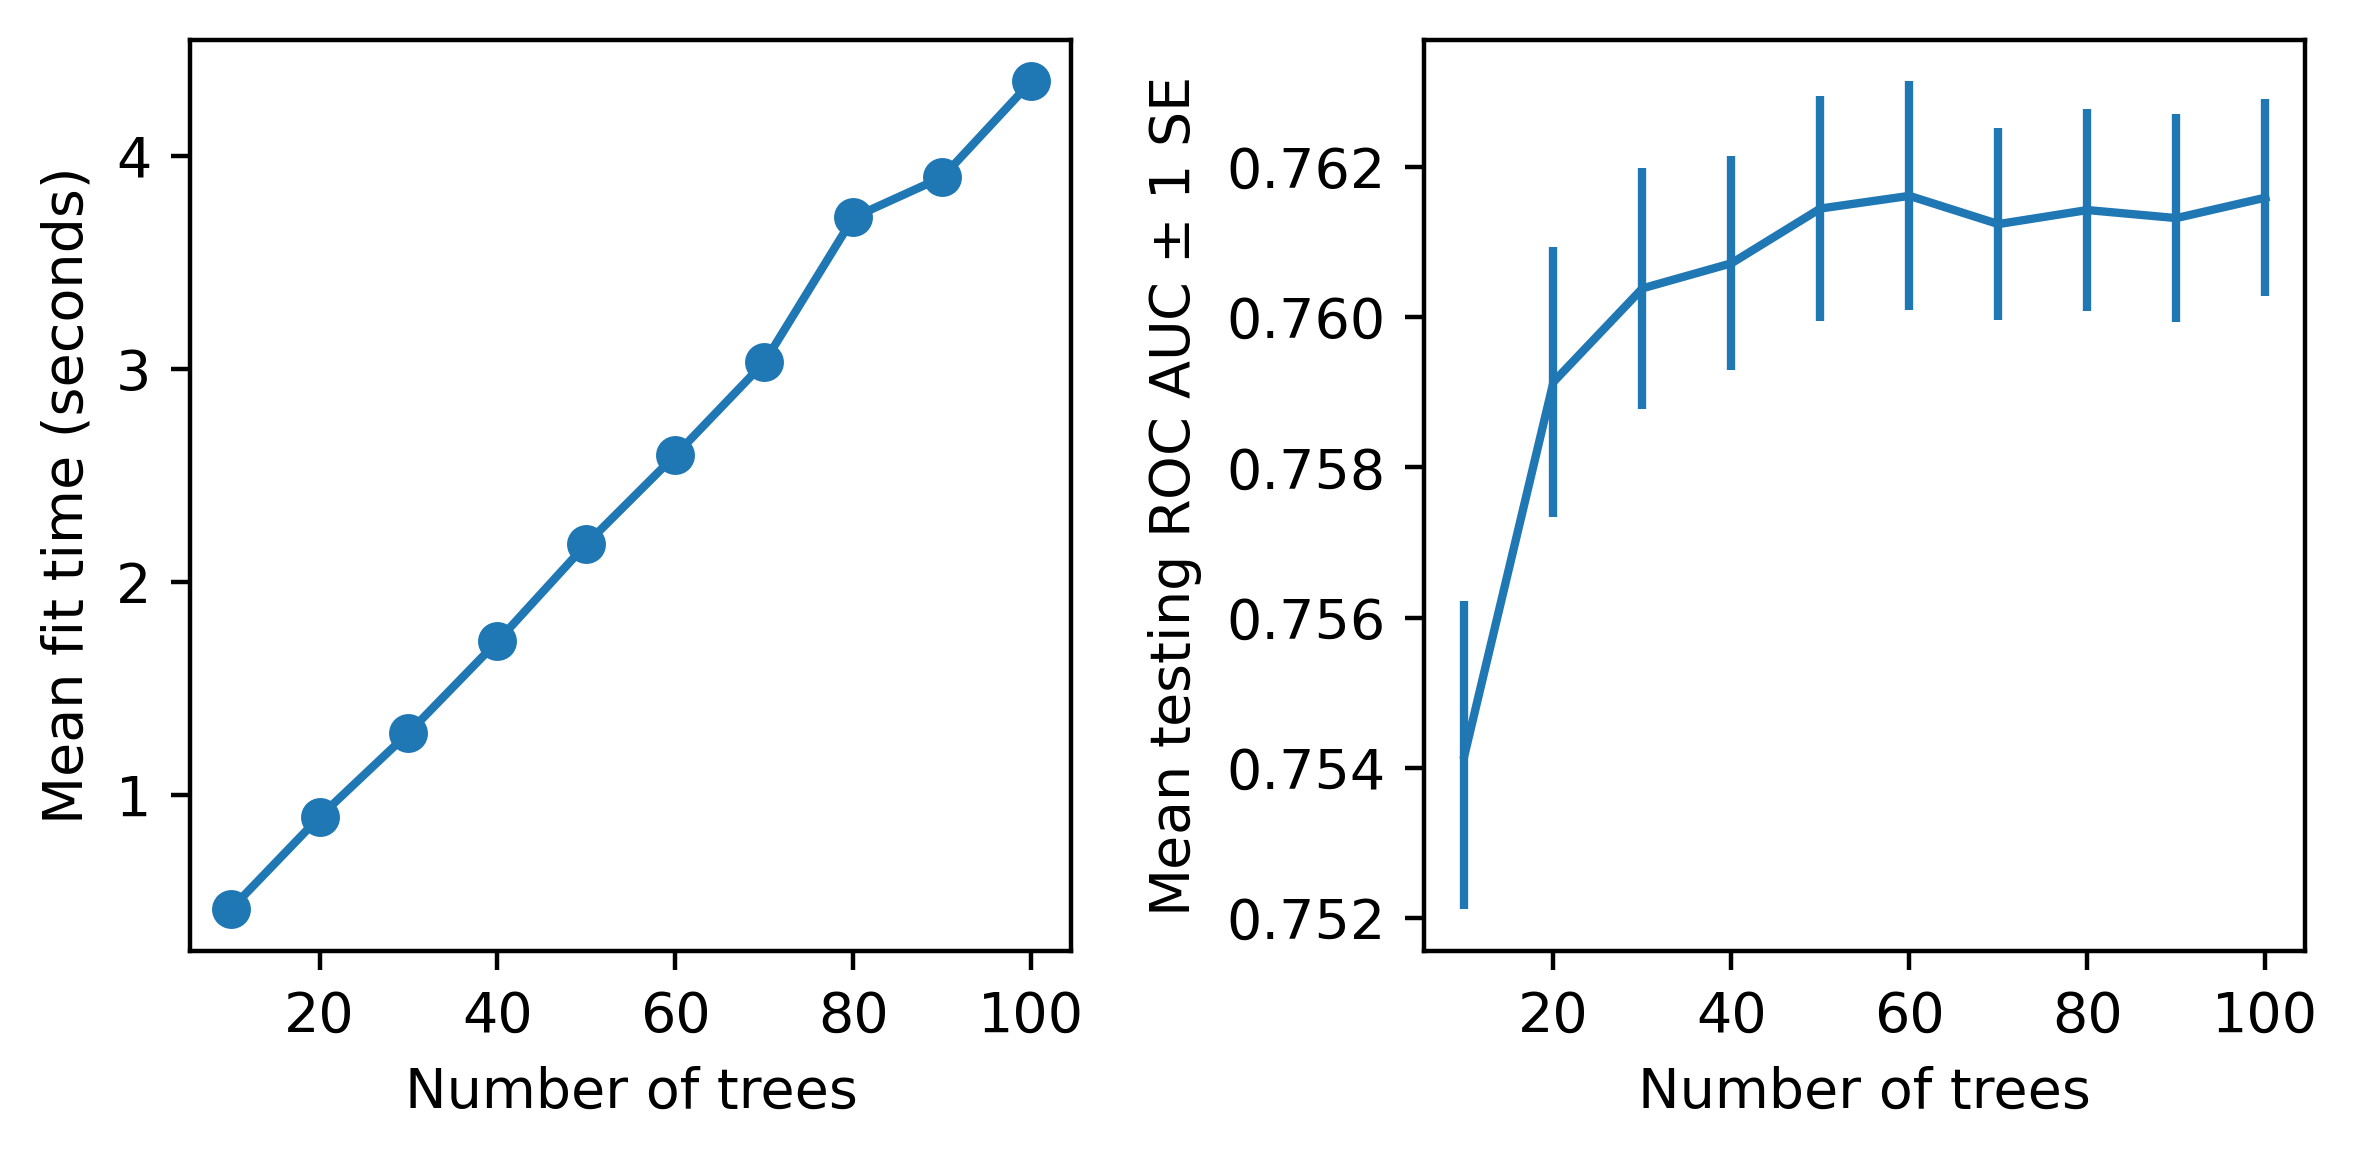

In [41]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
cv_rf_ex_results_df['mean_fit_time'],
'-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
cv_rf_ex_results_df['mean_test_score'],
yerr=cv_rf_ex_results_df['std_test_score']/np.sqrt(4))
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SE ')
plt.tight_layout()
plt.show()

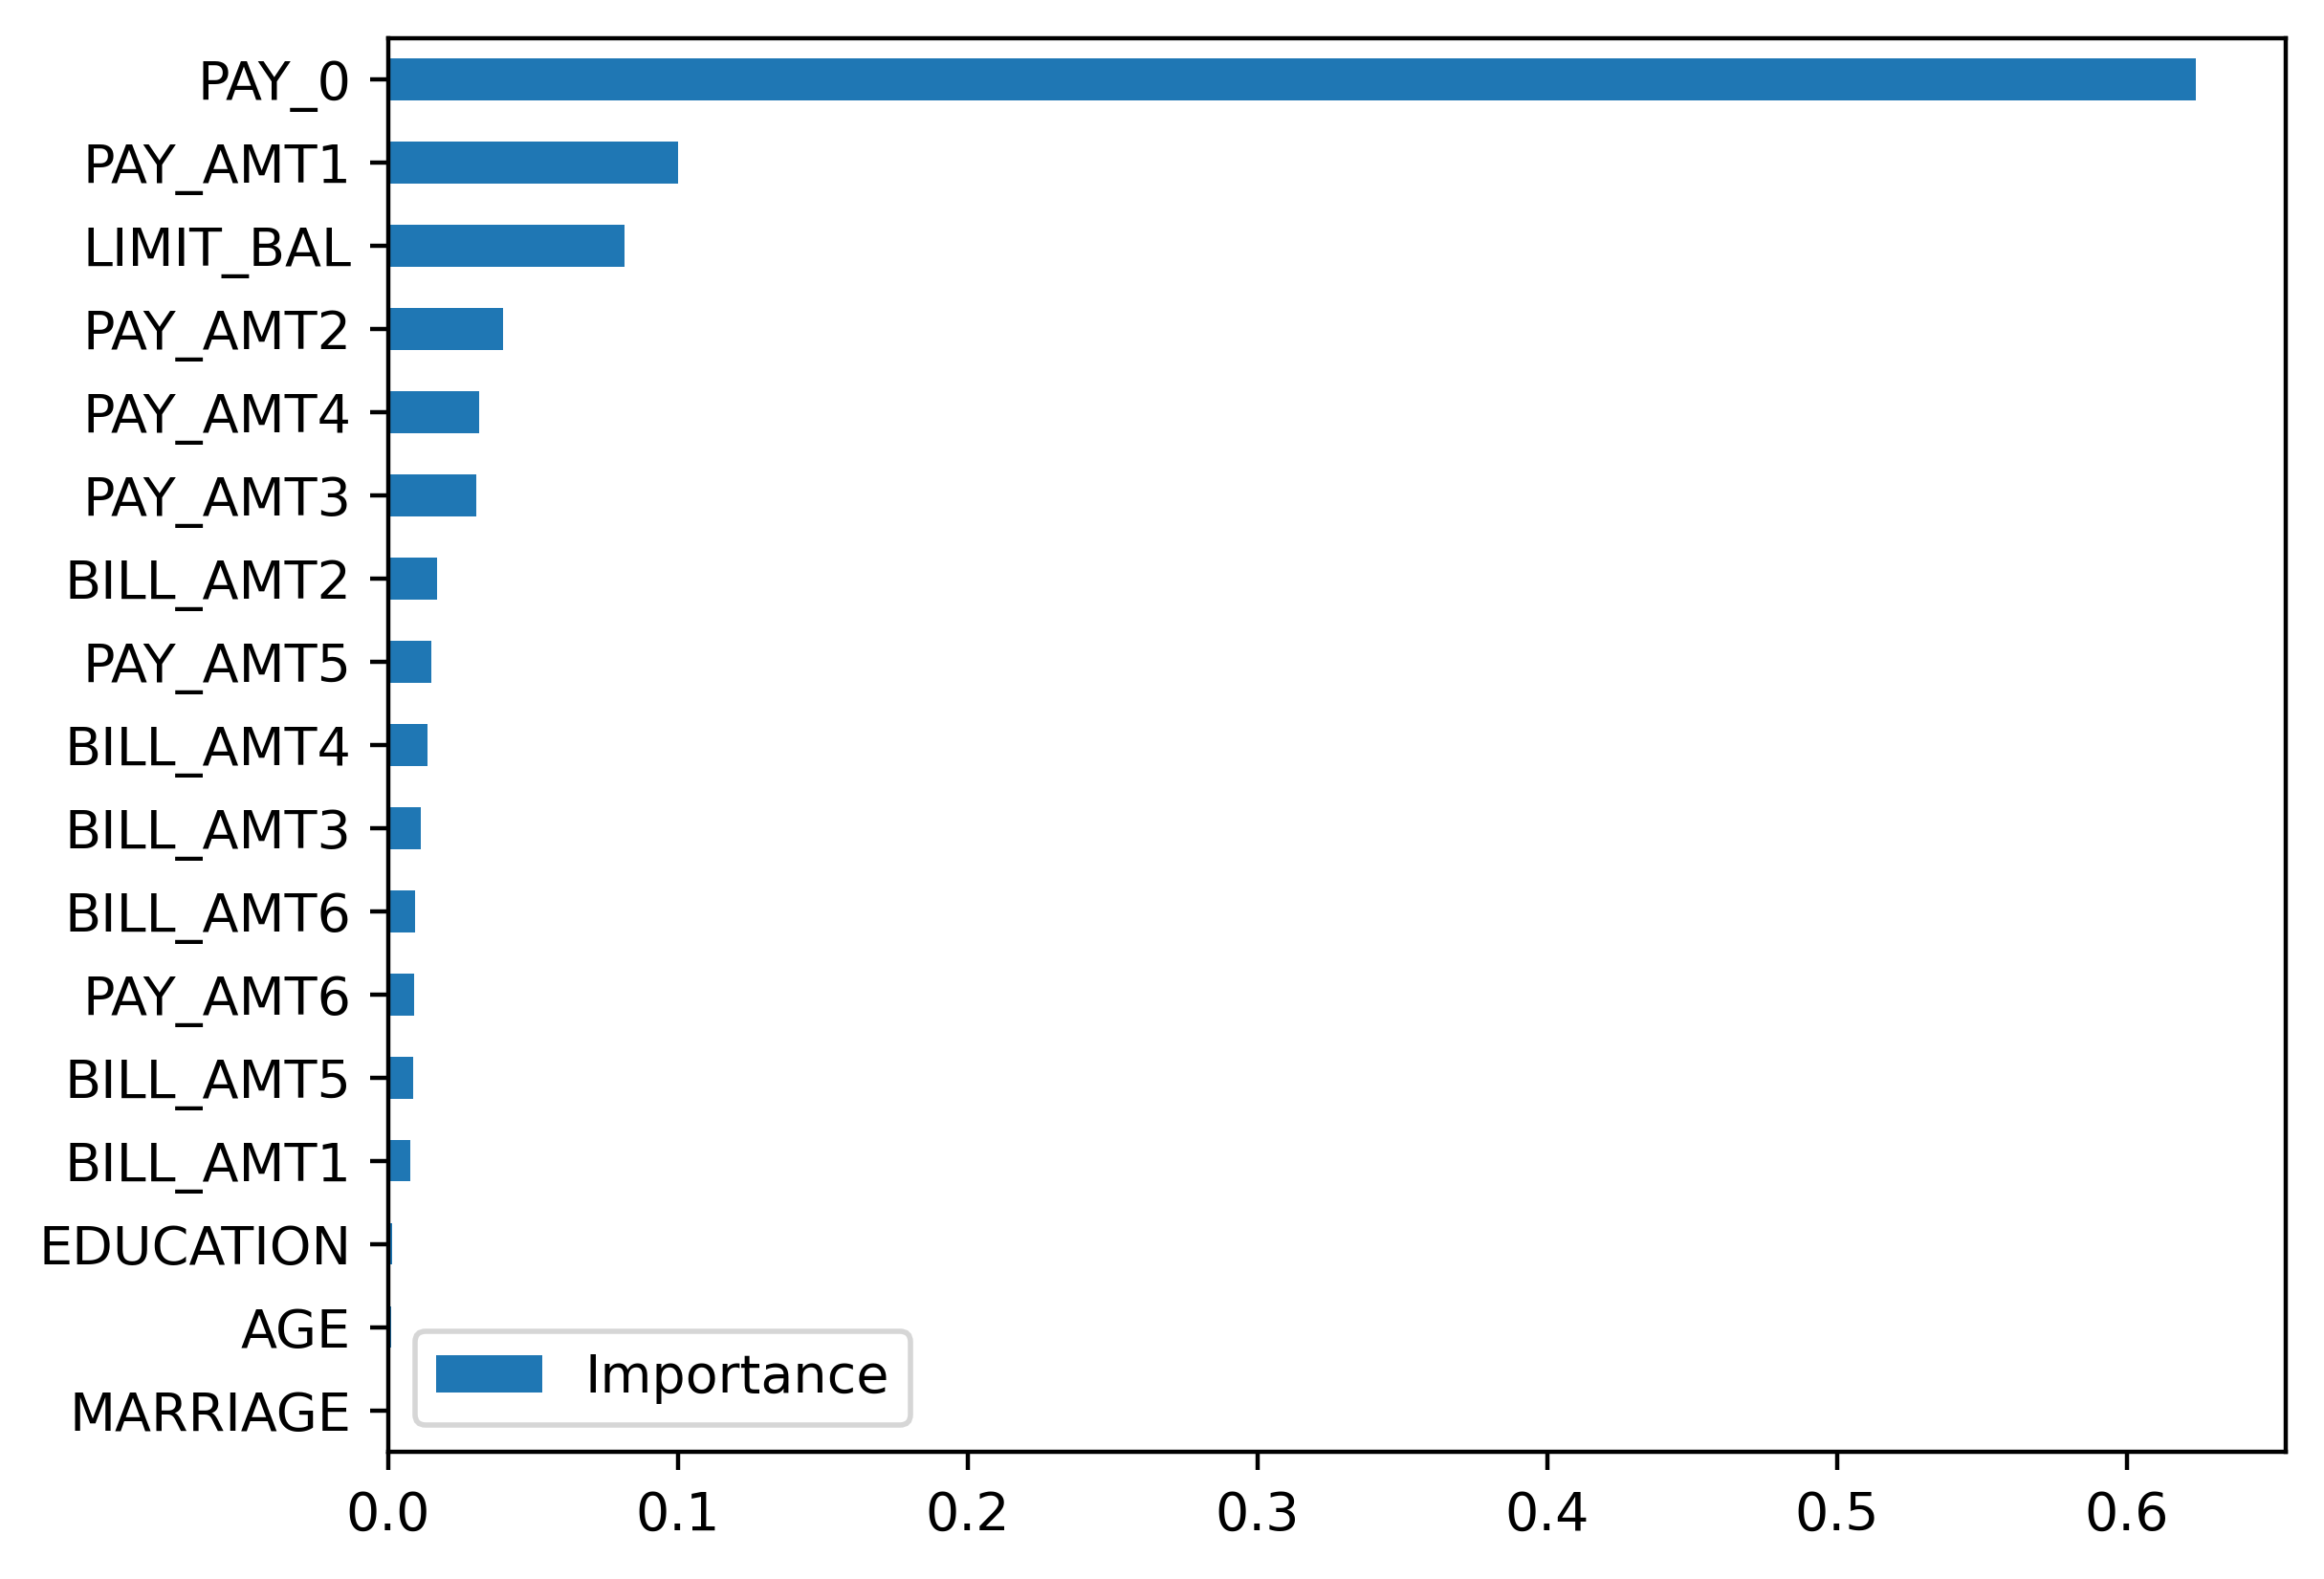

In [42]:
# {'n_estimators': 50}
cv_rf_ex.best_params_
# the feature names and importances
feat_imp_df = pd.DataFrame({
'Importance':cv_rf_ex.best_estimator_.feature_importances_},
index=features_response[:-1])
feat_imp_df.sort_values('Importance', ascending=True).plot.barh()
plt.show()